In [2]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# German Risk con mi preprocesamiento(1K)

In [2]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "GermanRisk/GermanRisk/german_credit_data_prepared.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Risk_True', axis=1)  # Características
y = datos_leidos['Risk_True']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "Risk_True"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
val[y] = val[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 20 modelos base
models = []
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 20 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.619 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_5_20240501_190454_model_2,0.685256,0.561691,0.491307,0.376903,0.435475,0.189638
StackedEnsemble_BestOfFamily_1_AutoML_5_20240501_190454,0.68402,0.565573,0.473454,0.371213,0.43757,0.191468
XGBoost_grid_1_AutoML_5_20240501_190454_model_2,0.679603,0.576102,0.474982,0.361935,0.441252,0.194703
GBM_3_AutoML_5_20240501_190454,0.677135,0.57074,0.477302,0.377823,0.439411,0.193082
StackedEnsemble_AllModels_1_AutoML_5_20240501_190454,0.676341,0.568057,0.472937,0.371388,0.438665,0.192427
GBM_grid_1_AutoML_5_20240501_190454_model_1,0.674515,0.569861,0.47162,0.368556,0.439612,0.193259
XGBoost_3_AutoML_5_20240501_190454,0.673569,0.601937,0.451391,0.358209,0.450169,0.202652
GLM_1_AutoML_5_20240501_190454,0.672633,0.575241,0.441435,0.364444,0.442064,0.195421
GBM_2_AutoML_5_20240501_190454,0.672221,0.573547,0.466611,0.364793,0.440626,0.194152
XGBoost_1_AutoML_5_20240501_190454,0.671264,0.575982,0.480036,0.402779,0.441313,0.194757


In [4]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('GermanRisk/AutoML/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [38]:

for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./GermanRisk/AutoML/{i}")

# German Risk sin mi preprocesamiento(1K)

In [2]:
import random
import pandas as pd
from sklearn.model_selection import train_val_split

random.seed(6)
nombre_archivo = "GermanRisk/GermanRisk/german_credit_data.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Risk', axis=1)  # Características
y = datos_leidos['Risk']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "Risk"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 20 modelos base
models = []
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.2" 2024-01-16 LTS; Java(TM) SE Runtime Environment (build 21.0.2+13-LTS-58); Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from /home/gregorio/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxwz2lvwd
  JVM stdout: /tmp/tmpxwz2lvwd/h2o_gregorio_started_from_python.out
  JVM stderr: /tmp/tmpxwz2lvwd/h2o_gregorio_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.881 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20240507_194712,0.757113,0.520414,0.876334,0.41741,0.417903,0.174643
StackedEnsemble_BestOfFamily_1_AutoML_1_20240507_194712,0.751204,0.525467,0.869953,0.431932,0.419868,0.176289
GLM_1_AutoML_1_20240507_194712,0.750525,0.528015,0.862553,0.471849,0.419759,0.176198
XGBoost_1_AutoML_1_20240507_194712,0.744487,0.539331,0.855294,0.462121,0.424317,0.180045
GBM_1_AutoML_1_20240507_194712,0.740081,0.535874,0.843844,0.414478,0.422193,0.178247
GBM_grid_1_AutoML_1_20240507_194712_model_2,0.739383,0.533848,0.851977,0.435436,0.421931,0.178026
DRF_1_AutoML_1_20240507_194712,0.73627,0.539792,0.859416,0.398774,0.424394,0.18011
GBM_4_AutoML_1_20240507_194712,0.736095,0.537081,0.850133,0.385469,0.422659,0.178641
GBM_3_AutoML_1_20240507_194712,0.735331,0.537697,0.852777,0.393731,0.423998,0.179774
DeepLearning_1_AutoML_1_20240507_194712,0.734128,0.556461,0.854328,0.422739,0.428824,0.18389


In [4]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('GermanRisk/AutoML2/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:

for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./GermanRisk/AutoML2/{i}")

# Diabetes con mi preprocesamiento (0,7K)

In [43]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "Diabetes/diabetes_prepared.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Outcome', axis=1)  # Características
y = datos_leidos['Outcome']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "Outcome"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 20 modelos base
models = []
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 4 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.640 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_7_20240501_194853,0.878988,0.415645,0.765942,0.191446,0.365508,0.133596
DeepLearning_grid_1_AutoML_7_20240501_194853_model_1,0.878174,0.464785,0.766175,0.18763,0.377576,0.142563
StackedEnsemble_AllModels_1_AutoML_7_20240501_194853,0.877882,0.418339,0.7595,0.185873,0.367584,0.135118
DeepLearning_grid_3_AutoML_7_20240501_194853_model_1,0.871916,0.473998,0.748385,0.186529,0.379133,0.143742
DeepLearning_grid_2_AutoML_7_20240501_194853_model_1,0.870043,0.501007,0.730576,0.181834,0.390171,0.152233
GBM_4_AutoML_7_20240501_194853,0.86865,0.430292,0.749258,0.199952,0.373811,0.139735
DRF_1_AutoML_7_20240501_194853,0.863428,0.487725,0.73624,0.205601,0.376786,0.141968
XGBoost_grid_1_AutoML_7_20240501_194853_model_2,0.861368,0.443471,0.726818,0.205232,0.379628,0.144117
GBM_3_AutoML_7_20240501_194853,0.858646,0.445741,0.718409,0.213305,0.381506,0.145547
GBM_2_AutoML_7_20240501_194853,0.858499,0.443629,0.728474,0.209857,0.380272,0.144607


In [45]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('Diabetes/AutoML/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [46]:

for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./Diabetes/AutoML/{i}")

# Diabetes sin mi preprocesamiento (0,7K)

In [5]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "Diabetes/diabetes.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Outcome', axis=1)  # Características
y = datos_leidos['Outcome']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "Outcome"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 20 modelos base
models = []
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321.

 connected.


H2O_cluster_uptime:,7 mins 38 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.842 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_2_20240507_195448,0.84356,0.470384,0.708928,0.220195,0.390041,0.152132
GBM_grid_1_AutoML_2_20240507_195448_model_2,0.839925,0.468514,0.705802,0.228853,0.393855,0.155122
StackedEnsemble_AllModels_1_AutoML_2_20240507_195448,0.835891,0.477784,0.708349,0.228051,0.393336,0.154713
DeepLearning_grid_1_AutoML_2_20240507_195448_model_1,0.834849,0.51789,0.695852,0.234432,0.402912,0.162338
DeepLearning_grid_2_AutoML_2_20240507_195448_model_1,0.833527,0.53321,0.693328,0.24066,0.403648,0.162932
GBM_1_AutoML_2_20240507_195448,0.833222,0.47557,0.699401,0.228706,0.396636,0.15732
DRF_1_AutoML_2_20240507_195448,0.83242,0.524582,0.69047,0.227243,0.396243,0.157009
GLM_1_AutoML_2_20240507_195448,0.832239,0.484244,0.702201,0.233548,0.398033,0.15843
GBM_grid_1_AutoML_2_20240507_195448_model_1,0.830377,0.47814,0.713127,0.236258,0.396714,0.157382
GBM_4_AutoML_2_20240507_195448,0.830278,0.482617,0.687806,0.23538,0.40081,0.160649


In [7]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('Diabetes/AutoML2/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [8]:

for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./Diabetes/AutoML2/{i}")

# Bank Marketing (41K)

In [3]:
nombre_archivo = "BankMarketing/bank-additional-full.csv"

datos_leidos = pd.read_csv(nombre_archivo, sep=';', quotechar='"')
datos_leidos.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5, 1.0, 'Boxplot de la duración')

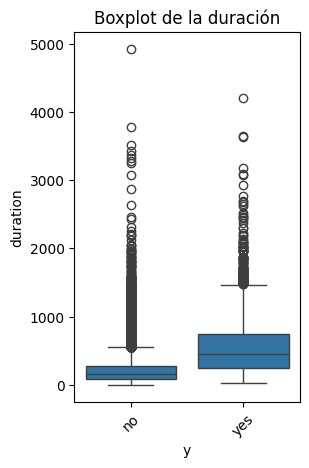

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primera posición
sns.boxplot(x='y', y='duration', data=datos_leidos)
plt.xticks(rotation=45)
plt.title('Boxplot de la duración')

La duración de la llamada actúa como predictor.

In [5]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "BankMarketing/bank-additional-full.csv"

datos_leidos = pd.read_csv(nombre_archivo, sep=';', quotechar='"')
datos_leidos.drop('duration', axis=1, inplace = True)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('y', axis=1)  # Características
y = datos_leidos['y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "y"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 15 modelos base
models = []
aml = H2OAutoML(max_models=15, seed=1, include_algos = ["DeepLearning", "DRF", "XGBoost", "GBM", "StackedEnsemble", "GLM"])
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.2" 2024-01-16 LTS; Java(TM) SE Runtime Environment (build 21.0.2+13-LTS-58); Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from /home/gregorio/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_d6_j1pw
  JVM stdout: /tmp/tmp_d6_j1pw/h2o_gregorio_started_from_python.out
  JVM stderr: /tmp/tmp_d6_j1pw/h2o_gregorio_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.885 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20240511_183201,0.803636,0.269187,0.475475,0.254114,0.275686,0.076003
StackedEnsemble_AllModels_1_AutoML_1_20240511_183201,0.802596,0.269325,0.47512,0.258419,0.27572,0.0760215
GBM_5_AutoML_1_20240511_183201,0.802521,0.271088,0.464001,0.256357,0.277019,0.0767394
XGBoost_3_AutoML_1_20240511_183201,0.800516,0.271221,0.46954,0.256098,0.276579,0.0764958
GBM_2_AutoML_1_20240511_183201,0.800104,0.271869,0.461573,0.260863,0.277454,0.0769807
GBM_3_AutoML_1_20240511_183201,0.799075,0.273632,0.455192,0.257685,0.278662,0.0776527
GBM_1_AutoML_1_20240511_183201,0.796799,0.271605,0.467148,0.256631,0.276578,0.0764952
GLM_1_AutoML_1_20240511_183201,0.793881,0.275308,0.455193,0.268419,0.279048,0.0778679
GBM_4_AutoML_1_20240511_183201,0.792913,0.275593,0.453163,0.27124,0.279477,0.0781074
XGBoost_grid_1_AutoML_1_20240511_183201_model_1,0.792162,0.277533,0.457077,0.262618,0.279399,0.0780638


In [7]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('BankMarketing/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [8]:
for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./BankMarketing/AutoML/{i}")

# Titanic Huge Dataset (1M)

In [66]:
nombre_archivo = "Titanic/huge_1M_titanic.csv"

datos_leidos = pd.read_csv(nombre_archivo)
datos_leidos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C


In [67]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "Titanic/huge_1M_titanic.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Survived', axis=1)  # Características
y = datos_leidos['Survived']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "Survived"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 15 modelos base
models = []
aml = H2OAutoML(max_models=15, seed=1, include_algos = ["DeepLearning", "DRF", "XGBoost", "GBM", "StackedEnsemble", "GLM"])
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,48 mins 36 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.286 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:53:29.308: _train param, Dropping bad and constant columns: [Name]

██
21:59:03.618: _train param, Dropping bad and constant columns: [Name]

██████████████
21:59:54.588: _train param, Dropping bad and constant columns: [Name]

███████████████
22:03:34.198: _train param, Dropping bad and constant columns: [Name]

███████████████████
22:08:20.497: _train param, Dropping bad and constant columns: [Name]

██████
22:13:27.414: _train param, Dropping bad and constant columns: [Name]

██
22:15:42.863: _train param, Dropping bad and constant columns: [Name]

█
22:18:06.949: _train param, Dropping bad and constant columns: [Name]

█
22:20:55.328: _train param, Dropping bad and constant columns: [Name]

██
22:30:57.737: _train param, Dropping bad and constant columns: [Name]


22:35:04.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20240501_215329,0.945386,0.280022,0.929561,0.130495,0.293435,0.0861042
StackedEnsemble_BestOfFamily_1_AutoML_2_20240501_215329,0.945233,0.280407,0.929363,0.130758,0.293619,0.0862123
XGBoost_grid_1_AutoML_2_20240501_215329_model_2,0.944386,0.283035,0.9281,0.132687,0.295281,0.0871906
XGBoost_2_AutoML_2_20240501_215329,0.943876,0.28439,0.927591,0.132539,0.295632,0.0873984
GBM_1_AutoML_2_20240501_215329,0.943691,0.28468,0.927674,0.132201,0.295521,0.0873327
GBM_4_AutoML_2_20240501_215329,0.943063,0.28669,0.926873,0.13322,0.296139,0.0876981
DRF_1_AutoML_2_20240501_215329,0.942902,0.287997,0.926717,0.132346,0.295901,0.0875575
XGBoost_grid_1_AutoML_2_20240501_215329_model_1,0.942478,0.287786,0.926032,0.134526,0.297337,0.0884092
XGBoost_1_AutoML_2_20240501_215329,0.942187,0.288078,0.925632,0.134452,0.297927,0.0887604
GBM_3_AutoML_2_20240501_215329,0.942072,0.289906,0.925817,0.133141,0.297276,0.0883729


In [69]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('Titanic/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [70]:
for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./Titanic/AutoML/{i}")

# Artificial Dataset (1M)

In [61]:
nombre_archivo = "ArtificialData/BinaryClass_1m.csv"

datos_leidos = pd.read_csv(nombre_archivo)
datos_leidos.head()

,Unnamed: 0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Class
0,0,0.265905,-1.779512,-3.280885,0.164727,1.090527,0.690742,0.424352,7.056372,168,...,0,0,1,0,0,1,2,0,0,0
1,1,0.965041,0.278549,3.743072,0.006583,1.439838,0.623385,0.679332,4.650126,151,...,1,0,1,1,0,0,0,2,0,0
2,2,0.648668,-1.145080,-2.332163,0.111092,3.867226,0.397730,0.982950,6.539507,167,...,1,0,1,0,0,0,0,0,1,1
3,3,0.464480,-0.706006,-0.021605,0.525589,1.039123,0.462690,0.011771,12.082375,153,...,0,0,0,1,0,1,0,2,0,1
4,4,0.570902,0.365630,-5.236326,0.559546,2.952963,0.803728,0.281474,13.872611,131,...,0,0,0,3,0,0,0,2,0,0


In [62]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "ArtificialData/BinaryClass_1m.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Class', axis=1)  # Características
y = datos_leidos['Class']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "Class"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 15 modelos base
models = []
aml = H2OAutoML(max_models=15, seed=1, include_algos = ["DeepLearning", "DRF", "XGBoost", "GBM", "StackedEnsemble", "GLM"])
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.2" 2024-01-16 LTS; Java(TM) SE Runtime Environment (build 21.0.2+13-LTS-58); Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from /home/gregorio/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd07op8ct
  JVM stdout: /tmp/tmpd07op8ct/h2o_gregorio_started_from_python.out
  JVM stderr: /tmp/tmpd07op8ct/h2o_gregorio_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.885 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:05:12.757: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]

██
21:10:51.270: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]

██
21:11:21.268: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]

██
21:12:08.536: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]

████████████████████████████
21:15:44.962: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]

███████████
21:20:07.457: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]


21:20:43.393: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]

█
21:21:20.858: _train param, Dropping bad and constant columns: [Feature_13, Feature_18]


21:22:00.312: _train para

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_1_20240501_210512,0.501292,0.671428,0.391624,0.499996,0.488986,0.239107
GBM_3_AutoML_1_20240501_210512,0.501078,0.669107,0.391485,0.499996,0.48793,0.238076
DRF_1_AutoML_1_20240501_210512,0.500911,0.670108,0.391474,0.499974,0.488419,0.238553
XGBoost_grid_1_AutoML_1_20240501_210512_model_2,0.500772,0.67859,0.390945,0.499993,0.492395,0.242453
XGBoost_2_AutoML_1_20240501_210512,0.500691,0.673633,0.390572,0.5,0.490081,0.240179
XGBoost_3_AutoML_1_20240501_210512,0.500535,0.669495,0.39115,0.5,0.488118,0.238259
GLM_1_AutoML_1_20240501_210512,0.500481,0.669066,0.391483,0.499998,0.48791,0.238056
XRT_1_AutoML_1_20240501_210512,0.500435,0.669836,0.390704,0.499999,0.488286,0.238424
XGBoost_grid_1_AutoML_1_20240501_210512_model_1,0.50009,0.672493,0.390691,0.499993,0.489555,0.239665
StackedEnsemble_BestOfFamily_1_AutoML_1_20240501_210512,0.500051,0.66906,0.390581,0.499996,0.487907,0.238054


In [64]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('ArtificialData/AutoML/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [65]:
for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./ArtificialData/AutoML/{i}")

# Santander Customer Satisfation (76K) clases desbalanceadas

In [3]:
nombre_archivo = "SantanderCustomerSat/train.csv"

datos_leidos = pd.read_csv(nombre_archivo)
datos_leidos.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [1]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(6)
nombre_archivo = "SantanderCustomerSat/train.csv"

datos_leidos = pd.read_csv(nombre_archivo)
# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('TARGET', axis=1)  # Características
y = datos_leidos['TARGET']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "TARGET"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Ejecutar AutoML para encontrar el mejor clasificador
# aml = H2OAutoML(max_runtime_secs=600, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# Ejecutar AutoML para 15 modelos base
models = []
aml = H2OAutoML(max_models=15, seed=1, include_algos = ["DeepLearning", "DRF", "XGBoost", "GBM", "StackedEnsemble", "GLM"])
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.2" 2024-01-16 LTS; Java(TM) SE Runtime Environment (build 21.0.2+13-LTS-58); Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from /home/gregorio/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp71od2ucg
  JVM stdout: /tmp/tmp71od2ucg/h2o_gregorio_started_from_python.out
  JVM stderr: /tmp/tmp71od2ucg/h2o_gregorio_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_gregorio_5vg209
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.885 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:44:13.332: _train param, Dropping bad and constant columns: [imp_trasp_var33_out_hace3, ind_var46, saldo_var2_ult1, ind_var27, ind_var28, num_var2_0_ult1, num_var41, imp_amort_var34_hace3, ind_var41, saldo_var41, saldo_medio_var13_medio_hace3, ind_var46_0, num_var46, num_trasp_var33_out_hace3, num_var27, saldo_var46, ind_var2, ind_var28_0, num_var28, saldo_var28, ind_var27_0, saldo_var27, num_reemb_var13_hace3, num_trasp_var17_out_hace3, num_var2_ult1, num_var46_0, num_var28_0, ind_var2_0, num_var27_0, imp_trasp_var17_out_hace3, imp_amort_var18_hace3, num_reemb_var33_hace3, imp_reemb_var33_hace3, imp_reemb_var13_hace3, saldo_medio_var29_hace3]

██
23:44:51.516: _train param, Dropping bad and constant columns: [imp_trasp_var33_out_hace3, ind_var46, saldo_var2_ult1, ind_var27, in

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20240501_234413,0.838357,0.134009,0.188984,0.302451,0.185508,0.0344131
StackedEnsemble_BestOfFamily_1_AutoML_1_20240501_234413,0.837493,0.13421,0.189784,0.294059,0.185528,0.0344207
GBM_2_AutoML_1_20240501_234413,0.834493,0.135621,0.179957,0.299374,0.186445,0.0347616
GBM_5_AutoML_1_20240501_234413,0.833187,0.137778,0.167903,0.314852,0.188114,0.035387
XGBoost_3_AutoML_1_20240501_234413,0.832969,0.135407,0.184112,0.302634,0.186118,0.03464
GBM_3_AutoML_1_20240501_234413,0.831274,0.136681,0.17118,0.29667,0.187172,0.0350333
GBM_1_AutoML_1_20240501_234413,0.83089,0.136198,0.176915,0.320954,0.186632,0.0348314
GBM_4_AutoML_1_20240501_234413,0.826534,0.137944,0.169447,0.3099,0.187606,0.035196
XGBoost_grid_1_AutoML_1_20240501_234413_model_2,0.822393,0.139199,0.168757,0.293678,0.187808,0.0352718
XGBoost_grid_1_AutoML_1_20240501_234413_model_1,0.821658,0.139149,0.167816,0.31635,0.187951,0.0353255


In [6]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('SantanderCustomerSat/AutoML/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [7]:
for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./SantanderCustomerSat/AutoML/{i}")

# Santander Customer Satisfation (76K) clases balanceadas

# EJECUTAR

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Read in the csv data using pandas 
train  = pd.read_csv('../SantanderCustomerSat/train.csv',index_col=0)

# Drop columns with just one value
features_to_drop = train.nunique()
features_to_drop = features_to_drop.loc[features_to_drop.values==1].index
# now drop these columns from both the training and the test datasets
train = train.drop(features_to_drop,axis=1)

X = train.iloc[:,:-1]
y = train['TARGET']
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, 
                                                  train_size=0.5,
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  shuffle=True)

from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

2024-05-13 11:32:58.921143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 11:32:59.830357: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 11:32:59.833509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 11:33:01.274252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML

# Convertir arrays de NumPy a DataFrames de pandas
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['TARGET'])

X_val_df = pd.DataFrame(X_val, columns=X.columns)
y_val_df = pd.DataFrame(y_val, columns=['TARGET'])

# Iniciar el clúster de H2O (localmente)
h2o.init()

# Convertir datos de pandas a H2OFrame
train = h2o.H2OFrame(pd.concat([X_train_df, y_train_df], axis=1))
val = h2o.H2OFrame(pd.concat([X_val_df, y_val_df], axis=1))

# Identificar predictores y respuesta
x = train.columns
y = "TARGET"
x.remove(y)

# Para clasificación binaria, la respuesta debe ser un factor
train[y] = train[y].asfactor()
val[y] = val[y].asfactor()

# Ejecutar AutoML para 15 modelos base
aml = H2OAutoML(max_models=15, seed=1, include_algos=["DeepLearning", "DRF", "XGBoost", "GBM", "StackedEnsemble", "GLM"])
aml.train(x=x, y=y, training_frame=train)

# Ver la tabla de clasificación del líder de AutoML
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Imprimir todas las filas en lugar de lo predeterminado (10 filas)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,26 mins 02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_gregorio_wrf6r6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.623 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:33:47.632: XGBoost_1_AutoML_1_20240513_113346 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_1_20240513_113346_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

11:33:47.647: _train param, Dropping bad and constant columns: [ind_var34, ind_var34_0, saldo_var34, delta_imp_amort_var34_1y3, num_var34_0, imp_amort_var34_ult1, num_var34]

█████████████████████████████████████████████████████████████
11:55:31.347: XGBoost_2_AutoML_1_20240513_113346 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_1_20240513_113346_cv_1.  Details: ERRR on fie

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_1_20240513_113346,0.960312,0.168135,0.949596,0.0397741,0.196009,0.0384194
DeepLearning_grid_1_AutoML_1_20240513_113346_model_2,0.960103,0.241145,0.948334,0.0398152,0.203183,0.0412835
GBM_grid_1_AutoML_1_20240513_113346_model_2,0.960058,0.167712,0.948314,0.0397741,0.195671,0.038287
GBM_1_AutoML_1_20240513_113346,0.959967,0.168099,0.948013,0.0397741,0.195656,0.0382814
GBM_2_AutoML_1_20240513_113346,0.959908,0.167958,0.947862,0.0397741,0.195694,0.0382961
DeepLearning_grid_1_AutoML_1_20240513_113346_model_1,0.959746,0.271044,0.944716,0.0401847,0.199875,0.0399502
DeepLearning_grid_2_AutoML_1_20240513_113346_model_1,0.959721,0.213935,0.945707,0.0399794,0.198248,0.0393022
GBM_grid_1_AutoML_1_20240513_113346_model_3,0.959612,0.167894,0.948001,0.0397741,0.195662,0.0382836
StackedEnsemble_BestOfFamily_1_AutoML_1_20240513_113346,0.959603,0.167989,0.947544,0.0397741,0.195638,0.0382743
GBM_grid_1_AutoML_1_20240513_113346_model_1,0.95955,0.168816,0.948089,0.0397741,0.195857,0.0383599


In [3]:
# Convertir la tabla de clasificación a un DataFrame de pandas
lb_df = lb.as_data_frame()

# Guardar el DataFrame en un archivo CSV
lb_df.to_csv('SantanderCustomerSat/AutoML2/autoML.csv', index=False)

/home/gregorio/.local/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


OSError: Cannot save file into a non-existent directory: 'SantanderCustomerSat/AutoML2'

In [ ]:
for i in range(1,len(aml.leaderboard['model_id'])):
    aml1 = h2o.get_model(aml.leaderboard[i, 0]) # get model object in environment
    h2o.save_model(aml1, path=f"./SantanderCustomerSat/AutoML2/{i}")